# Infilling the IMAGE POEM scenario B

Applying infilling to the POEM scenario from  which contains only CO2 from Energy and Industry. 

Note that the first runthrough will require collecting large amounts of data and hence will be slow. 

## Imports

In [1]:
import os.path

import pandas as pd
import pyam
import matplotlib.pyplot as plt
import numpy as np

import silicone.multiple_infillers as mi
import silicone.database_crunchers as cr
from silicone.utils import (
    find_matching_scenarios,
    download_or_load_sr15,
)

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


## Our data

We download data from the SR1.5 database for the other scenarios we will use to infill. 

In [2]:
sr15_file = "./../input/complete_sr15.csv"
all_models = [
    'AIM/CGE 2.0', 'AIM/CGE 2.1', 'C-ROADS-5.005', 'GCAM 4.2', 'GENeSYS-MOD 1.0', 
    'IEA Energy Technology Perspective Model 2017', 'IEA World Energy Model 2017', 
    'IMAGE 3.0.1', 'IMAGE 3.0.2', 'MERGE-ETL 6.0', 'MESSAGE V.3', 'MESSAGE-GLOBIOM 1.0', 
    'MESSAGEix-GLOBIOM 1.0', 'POLES ADVANCE', 'POLES CD-LINKS', 'POLES EMF33', 'REMIND 1.5', 
    'REMIND 1.7', 'REMIND-MAgPIE 1.5', 'REMIND-MAgPIE 1.7-3.0', 
    'Shell World Energy Model 2018', 'WITCH-GLOBIOM 3.1', 'WITCH-GLOBIOM 4.2', 'WITCH-GLOBIOM 4.4'
]

df = download_or_load_sr15(sr15_file, all_models).filter(region="World") 
df.head()

pyam.core - INFO: Reading file `./../input/complete_sr15.csv`


,model,scenario,region,variable,unit,year,subannual,meta,value
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Emissions|BC,Mt BC/yr,2005,0.0,0,8.3367
1,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Emissions|BC,Mt BC/yr,2010,0.0,0,7.6408
2,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Emissions|BC,Mt BC/yr,2015,0.0,0,7.2724
3,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Emissions|BC,Mt BC/yr,2020,0.0,0,7.0752
4,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Emissions|BC,Mt BC/yr,2025,0.0,0,5.8486


The IMAGE model POEM scenarios themselves are found in the AR5 database instead. 

In [3]:
ar5_file = "./../input/DownloadedAR5Database.csv"
ar5_df = pyam.IamDataFrame(ar5_file)

pyam.core - INFO: Reading file `./../input/DownloadedAR5Database.csv`


In [4]:
ar5_df.filter(scenario="POEM*").scenarios()

0              POEM_ScenarioA
1          POEM_ScenarioA_CPH
2    POEM_ScenarioB_CPH_early
3               POEM_baseline
Name: scenario, dtype: object

In [5]:
df_to_infill = ar5_df.filter(scenario="POEM_ScenarioB_CPH_early")
df_to_infill.head(10)

,model,scenario,region,variable,unit,year,value
73098,IMAGE 2.4,POEM_ScenarioB_CPH_early,World,Emissions|CO2|Fossil Fuels and Industry,Mt CO2/yr,2005,27796.94138
73099,IMAGE 2.4,POEM_ScenarioB_CPH_early,World,Emissions|CO2|Fossil Fuels and Industry,Mt CO2/yr,2010,30532.69672
73100,IMAGE 2.4,POEM_ScenarioB_CPH_early,World,Emissions|CO2|Fossil Fuels and Industry,Mt CO2/yr,2020,34784.49365
73101,IMAGE 2.4,POEM_ScenarioB_CPH_early,World,Emissions|CO2|Fossil Fuels and Industry,Mt CO2/yr,2030,29101.69000
73102,IMAGE 2.4,POEM_ScenarioB_CPH_early,World,Emissions|CO2|Fossil Fuels and Industry,Mt CO2/yr,2040,22482.03725
73103,IMAGE 2.4,POEM_ScenarioB_CPH_early,World,Emissions|CO2|Fossil Fuels and Industry,Mt CO2/yr,2050,16341.10552


We need to rename the only variable to make it the same as the AR1.5 database. We also need to add the "meta" and "subannual" columns. 

In [6]:
lead =  ["Emissions|CO2|Energy and Industrial Processes"]
df_to_infill.rename(variable={"Emissions|CO2|Fossil Fuels and Industry":lead}, inplace=True)
df_to_infill["meta"] = 0
df_to_infill["subannual"] = 0.0
df_to_infill = pyam.IamDataFrame(df_to_infill.data)
df_to_infill.head(10)

,model,scenario,region,variable,unit,year,meta,subannual,value
0,IMAGE 2.4,POEM_ScenarioB_CPH_early,World,Emissions|CO2|Energy and Industrial Processes,Mt CO2/yr,2005,0,0.0,27796.94138
1,IMAGE 2.4,POEM_ScenarioB_CPH_early,World,Emissions|CO2|Energy and Industrial Processes,Mt CO2/yr,2010,0,0.0,30532.69672
2,IMAGE 2.4,POEM_ScenarioB_CPH_early,World,Emissions|CO2|Energy and Industrial Processes,Mt CO2/yr,2020,0,0.0,34784.49365
3,IMAGE 2.4,POEM_ScenarioB_CPH_early,World,Emissions|CO2|Energy and Industrial Processes,Mt CO2/yr,2030,0,0.0,29101.69000
4,IMAGE 2.4,POEM_ScenarioB_CPH_early,World,Emissions|CO2|Energy and Industrial Processes,Mt CO2/yr,2040,0,0.0,22482.03725
5,IMAGE 2.4,POEM_ScenarioB_CPH_early,World,Emissions|CO2|Energy and Industrial Processes,Mt CO2/yr,2050,0,0.0,16341.10552


### Comparing timelines
In order to establish the best infilling method, we should see how it compares to the other available trend lines. We plot POEM scenario B in black.

Text(0, 0.5, 'Mt CO$_2$/yr')

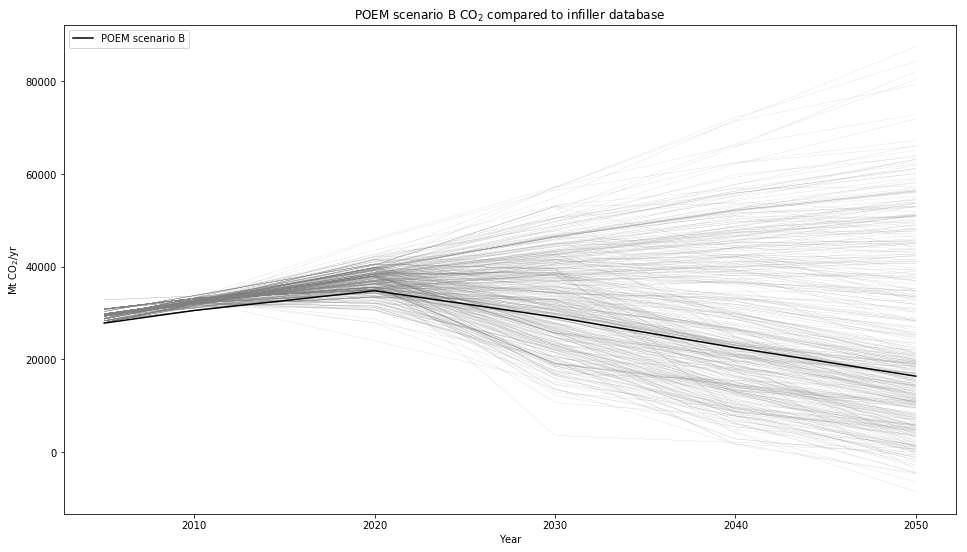

In [7]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
df.filter(variable=lead, year=df_to_infill.data["year"].unique()).line_plot(
    ax=ax, linewidth=0.1, label='_nolegend_', color="grey"
)
df_to_infill.filter(variable=lead).line_plot(ax=ax, color="black", label="POEM scenario B")
ax.set_title("POEM scenario B CO$_2$ compared to infiller database")
ax.set_ylabel("Mt CO$_2$/yr")

We see that the CO$_2$ results for future times are well within the expected range. This means we can use an absolute value infilling method. Temporal consistency would point us towards using the RMS closest method, conservatism of the estimate and mathching the behaviour at each time would point towards using the quantile rolling window method. Other infillers are more speculative. We shall see how the methods vary. 

To save time, we will only infill a subset of the possible required variables. 

In [8]:
variables_of_interest = [
    "Emissions|CO2|AFOLU", # We should not do the total CO2 in this way - infill components and add them if needed
    "Emissions|N2O",
    "Emissions|F-Gases",
    "Emissions|CH4",
    "Emissions|Sulfur"
]
quantile_infilled = mi.infill_all_required_variables(
    df_to_infill,
    df,
    variable_leaders=lead,
    required_variables_list=variables_of_interest, # If None, would infill a default list
    cruncher=cr.QuantileRollingWindows,
    output_timesteps=df_to_infill.data["year"].unique().tolist(),
    infilled_data_prefix=None,
    to_fill_old_prefix=None,
    check_data_returned=False,
)

Filling required variables: 100%|████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.81it/s]


Data is infilled as expected

In [9]:
quantile_infilled.timeseries().head()

2005  \
model     scenario                 region variable                                      unit            meta subannual                 
IMAGE 2.4 POEM_ScenarioB_CPH_early World  Emissions|CH4                                 Mt CH4/yr       0    0.0          347.236618   
                                          Emissions|CO2|AFOLU                           Mt CO2/yr       0    0.0         4033.333333   
                                          Emissions|CO2|Energy and Industrial Processes Mt CO2/yr       0    0.0        27796.941380   
                                          Emissions|F-Gases                             Mt CO2-equiv/yr 0    0.0          691.979703   
                                          Emissions|N2O                                 kt N2O/yr       0    0.0         9541.530470   

                                                                                                                                2010  \
model     scenario                 region variable                                      unit            meta subannual                 
IMAGE 2.4 POEM_ScenarioB_CPH_early World  Emissions|CH4                                 Mt CH4/yr       0    0.0          366.083353   
                                          Emissions|CO2|AFOLU                           Mt CO2/yr       0    0.0         3434.516962   
                                          Emissions|CO2|Energy and Industrial Processes Mt CO2/yr       0    0.0        30532.696720   
                                          Emissions|F-Gases                             Mt CO2-equiv/yr 0    0.0          876.222679   
                                          Emissions|N2O                                 kt N2O/yr       0    0.0         9960.706781   

                                                                                                                                2020  \
model     scenario                 region variable                                      unit            meta subannual                 
IMAGE 2.4 POEM_ScenarioB_CPH_early World  Emissions|CH4                                 Mt CH4/yr       0    0.0          341.906693   
                                          Emissions|CO2|AFOLU                           Mt CO2/yr       0    0.0         4145.747823   
                                          Emissions|CO2|Energy and Industrial Processes Mt CO2/yr       0    0.0        34784.493650   
                                          Emissions|F-Gases                             Mt CO2-equiv/yr 0    0.0         1280.221158   
                                          Emissions|N2O                                 kt N2O/yr       0    0.0        10125.907500   

                                                                                                                                2030  \
model     scenario                 region variable                                      unit            meta subannual                 
IMAGE 2.4 POEM_ScenarioB_CPH_early World  Emissions|CH4                                 Mt CH4/yr       0    0.0          282.158471   
                                          Emissions|CO2|AFOLU                           Mt CO2/yr       0    0.0         1122.495995   
                                          Emissions|CO2|Energy and Industrial Processes Mt CO2/yr       0    0.0        29101.690000   
                                          Emissions|F-Gases                             Mt CO2-equiv/yr 0    0.0          618.735128   
                                          Emissions|N2O                                 kt N2O/yr       0    0.0         9851.507683   

                                                                                                                                2040  \
model     scenario                 region variable                                      unit            meta subannual                 
IMAGE 2.4 POEM_ScenarioB_CPH_early World  Em

This is now a complete dataset that we can use in climate simulations (after we append the original CO$_2$|Energy and industry). 

In [10]:
quantile_infilled.variables()

0                                    Emissions|CH4
1                              Emissions|CO2|AFOLU
2    Emissions|CO2|Energy and Industrial Processes
3                                Emissions|F-Gases
4                                    Emissions|N2O
5                                 Emissions|Sulfur
Name: variable, dtype: object

In [11]:
df.filter(scenario="PO*").scenarios()

Series([], Name: scenario, dtype: object)

We repeat the process for the other crunchers to compare results, starting with RMS closest. 

In [12]:
closest_infilled = mi.infill_all_required_variables(
    df_to_infill,
    df,
    variable_leaders=lead,
    required_variables_list=variables_of_interest, 
    cruncher=cr.RMSClosest,
    output_timesteps=df_to_infill.data["year"].unique().tolist(),
    infilled_data_prefix=None,
    to_fill_old_prefix=None,
    check_data_returned=False,
)

Filling required variables: 100%|████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.49it/s]


For the interpolate specified model method, we need to know which scenarios are comparable. POEM scenario B is fairly midde-of-the-road, so we use the SSP2 scenarios from their marker model, MESSAGE. We considered using SSP5 scenarios with their marker model, REMIND-MAgPIE 1.5, however this does not extend to high enough values for later times. (Discrepancies before 2020 will disappear upon harmonisation.) It's most efficient to do the filtering outside the multiple infiller, rather than repeat it for every variable within the `infill_all_required_variables function`.

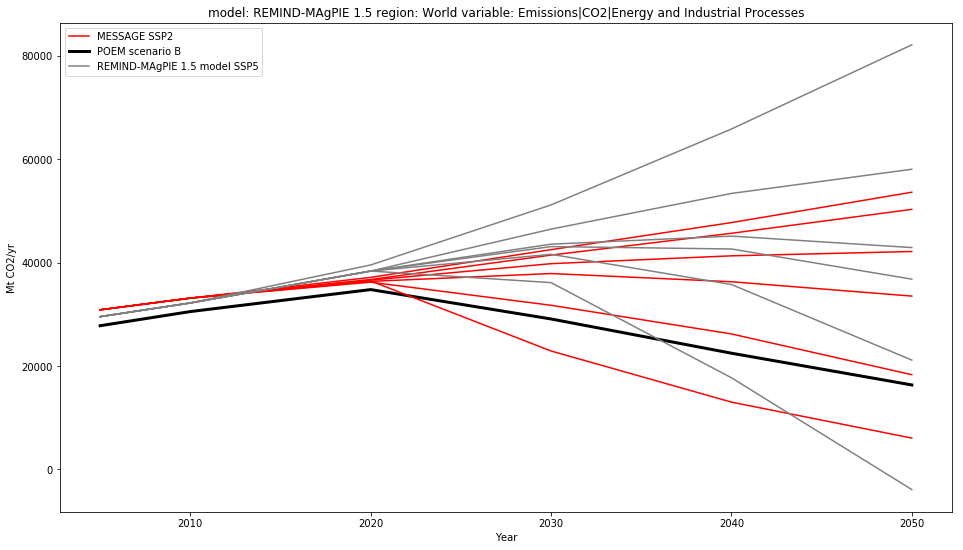

In [13]:
df_spec = df.filter(model="MESSAGE*", scenario="SSP2*")
yearlist = df_to_infill["year"].unique()
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
df_to_infill.filter(variable=lead).line_plot(ax=ax, color="black", label="POEM scenario B", linewidth=3)
ax.set_title("POEM scenario B CO$_2$ compared to infiller database")
ax.set_ylabel("Mt CO$_2$/yr")
df_spec.filter(variable=lead, year=yearlist).line_plot(ax=ax, color="red", label="MESSAGE SSP2")
df.filter(model="REMIND-MAgPIE 1.5", scenario="SSP5*", variable=lead, year=yearlist).line_plot(
    ax=ax, color="grey", label="REMIND-MAgPIE 1.5 model SSP5"
)

In [14]:
interp_spec_infilled = mi.infill_all_required_variables(
    df_to_infill,
    df_spec,
    variable_leaders=lead,
    required_variables_list=variables_of_interest,
    cruncher=cr.LinearInterpolation,
    output_timesteps=df_to_infill.data["year"].unique().tolist(),
    infilled_data_prefix=None,
    to_fill_old_prefix=None,
    check_data_returned=False,
)

Filling required variables: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.89it/s]


In this case, many variables could not be found. 

We can also interpolate using all values, which will find all variables in the infiller database. However this is rarely a good idea, as the chaotic results shown later depict.

In [15]:
interp_infilled = mi.infill_all_required_variables(
    df_to_infill,
    df,
    variable_leaders=lead,
    required_variables_list=variables_of_interest,
    cruncher=cr.LinearInterpolation,
    output_timesteps=df_to_infill.data["year"].unique().tolist(),
    infilled_data_prefix=None,
    to_fill_old_prefix=None,
    check_data_returned=False,
)

Filling required variables: 100%|████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.95it/s]


In [16]:
interp_spec_infilled.variables()

0                                    Emissions|CH4
1                              Emissions|CO2|AFOLU
2    Emissions|CO2|Energy and Industrial Processes
3                                Emissions|F-Gases
4                                    Emissions|N2O
5                                 Emissions|Sulfur
Name: variable, dtype: object

Finally we can compare to the EQW method, used in existing literature. 

In [17]:
EQW_infilled = mi.infill_all_required_variables(
    df_to_infill,
    df,
    variable_leaders=lead,
    required_variables_list=variables_of_interest, 
    cruncher=cr.EqualQuantileWalk,
    output_timesteps=df_to_infill.data["year"].unique().tolist(),
    infilled_data_prefix=None,
    to_fill_old_prefix=None,
    check_data_returned=False,
)

Filling required variables: 100%|████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.86it/s]


In [18]:
df.timeseries()

2000  \
model             scenario               region variable                                           unit            subannual meta         
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100 World  Emissions|BC                                       Mt BC/yr        0.0       0      NaN   
                                                Emissions|CH4                                      Mt CH4/yr       0.0       0      NaN   
                                                Emissions|CH4|AFOLU                                Mt CH4/yr       0.0       0      NaN   
                                                Emissions|CH4|Energy|Demand|Industry               Mt CH4/yr       0.0       0      NaN   
                                                Emissions|CH4|Energy|Demand|Residential and Com... Mt CH4/yr       0.0       0      NaN   
...                                                                                                                                 ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NoPolicy      World  Emissions|Kyoto Gases (AR5-GWP100)                 Mt CO2-equiv/yr 0.0       0      NaN   
                                                Emissions|Kyoto Gases (SAR-GWP100)                 Mt CO2-equiv/yr 0.0       0      NaN   
                                                Emissions|N2O                                      kt N2O/yr       0.0       0      NaN   
                                                Emissions|N2O|AFOLU                                kt N2O/yr       0.0       0      NaN   
                                                Emissions|Sulfur                                   Mt SO2/yr       0.0       0      NaN   

                                                                                                                                           2005  \
model             scenario               region variable                                           unit            subannual meta                 
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100 World  Emissions|BC                                       Mt BC/yr        0.0       0         8.336700   
                                                Emissions|CH4                                      Mt CH4/yr       0.0       0       344.916700   
                                                Emissions|CH4|AFOLU                                Mt CH4/yr       0.0       0       167.671700   
                                                Emissions|CH4|Energy|Demand|Industry               Mt CH4/yr       0.0       0         0.473200   
                                                Emissions|CH4|Energy|Demand|Residential and Com... Mt CH4/yr       0.0       0        11.263900   
...                                                                                                                                         ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NoPolicy      World  Emissions|Kyoto Gases (AR5-GWP100)                 Mt CO2-equiv/yr 0.0       0     45937.586830   
                                                Emissions|Kyoto Gases (SAR-GWP100)                 Mt CO2-equiv/yr 0.0       0     43843.835950   
                                                Emissions|N2O                                      kt N2O/yr       0.0       0     10643.470010   
                                                Emissions|N2O|AFOLU                                kt N2O/yr       0.0       0      9037.852277   
                                                Emissions|Sulfur                                   Mt SO2/yr       0.0       0        98.753000   

                                                                                                                                           2010  \
model             scenario               region variable                                           unit            subannual meta                 
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100 World  Emissions|BC                                       Mt BC/yr        0.

Text(0.5, 1.0, 'POEM scenario methane emissions infilled with different methods')

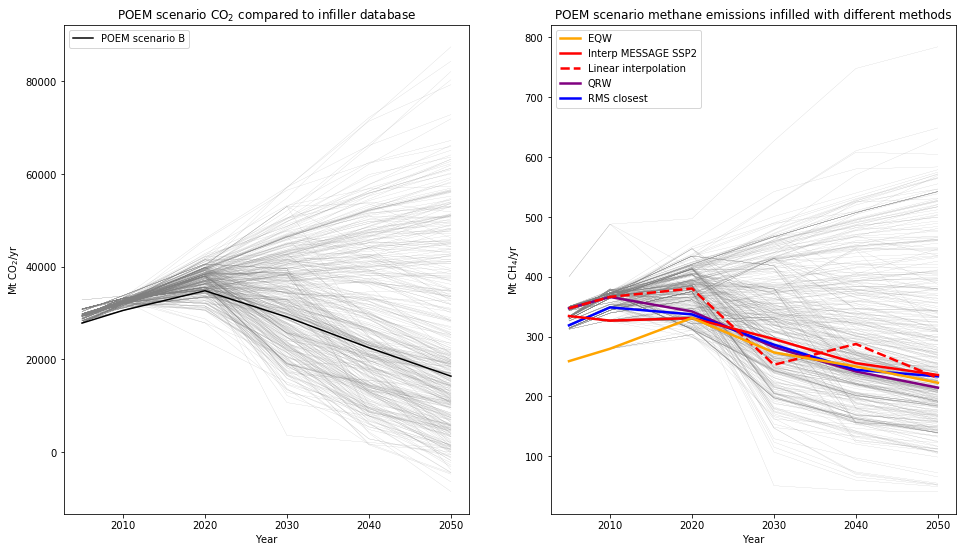

In [19]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(121)
df.filter(variable=lead, year=df_to_infill.data["year"].unique()).line_plot(
    ax=ax, linewidth=0.1, label='_nolegend_', color="grey"
)
df_to_infill.filter(variable=lead).line_plot(ax=ax, color="black", label="POEM scenario B")
ax.set_title("POEM scenario CO$_2$ compared to infiller database")
ax.set_ylabel("Mt CO$_2$/yr")
ax = fig.add_subplot(122)
df.filter(variable="Emissions|CH4", year=df_to_infill.data["year"].unique()).line_plot(
    ax=ax, linewidth=0.1, label='_nolegend_', color="grey"
)
quantile_infilled.filter(variable="Emissions|CH4").line_plot(
    ax=ax, linewidth=2.5, color="purple", label="QRW"
)
closest_infilled.filter(variable="Emissions|CH4").line_plot(
    ax=ax, color="blue", linewidth=2.5, label="RMS closest"
)
interp_spec_infilled.filter(variable="Emissions|CH4").line_plot(
    ax=ax, color="red", linewidth=2.5, label="Interp MESSAGE SSP2"
)
interp_infilled.filter(variable="Emissions|CH4").line_plot(
    ax=ax, color="red", linewidth=2.5, label="Linear interpolation", linestyle="--"
)
EQW_infilled.filter(variable="Emissions|CH4").line_plot(
    ax=ax, color="orange", linewidth=2.5, label="EQW"
)
ax.set_ylabel("Mt CH$_4$/yr")
ax.set_title("POEM scenario methane emissions infilled with different methods")